Load POT 

In [1]:
import numpy as np
import matplotlib.pylab as pl
import ot
import ot.plot
import os 

In [2]:
# only use type 1 fonts in figures 
pl.rcParams['ps.useafm'] = True
pl.rcParams['pdf.use14corefonts'] = True
pl.rcParams['text.usetex'] = True

Set correct path

In [3]:
os.chdir("..")
print(os.getcwd())

/home/samuel/Documents/projects/ABC with deep learning/code


Load exact posterior

In [4]:
exact_posterior = np.transpose(np.loadtxt(open("data/MA2 noisy data/posteriors_multiple_data_sets_exact.csv", "rb"), delimiter=",", skiprows=1))
print(exact_posterior)
print(exact_posterior.shape)

[[0.45663382 0.45663382 0.45663382 ... 0.40693545 0.40693545 0.50781389]
 [0.11278432 0.11278432 0.11278432 ... 0.06702766 0.06702766 0.17467297]
 [0.55348793 0.55348793 0.55348793 ... 0.5238274  0.5238274  0.5238274 ]
 ...
 [0.16702474 0.16702474 0.16702474 ... 0.09292862 0.09292862 0.09292862]
 [0.40906104 0.40906104 0.40906104 ... 0.50024197 0.5504418  0.5504418 ]
 [0.33240456 0.33240456 0.33240456 ... 0.15279573 0.32326326 0.32326326]]
(200, 100001)


## Compare ABC with handpicked summary, PEN and MLP

Load data

In [5]:
posterior_handpicked = np.loadtxt(open("data/MA2 noisy data/posteriors_multiple_data_sets_abcrs.csv", "rb"), delimiter=",", skiprows=1)
posterior_mlp = np.loadtxt(open("data/MA2 noisy data/posteriors_multiple_data_sets_mlp_1_small.csv", "rb"), delimiter=",", skiprows=1)
posterior_mlp_small = np.loadtxt(open("data/MA2 noisy data/posteriors_multiple_data_sets_mlp_1_small.csv", "rb"), delimiter=",", skiprows=1)
posterior_mlp_large = np.loadtxt(open("data/MA2 noisy data/posteriors_multiple_data_sets_mlp_1_large.csv", "rb"), delimiter=",", skiprows=1)
posterior_pen = np.loadtxt(open("data/MA2 noisy data/posteriors_multiple_data_sets_pen_1.csv", "rb"), delimiter=",", skiprows=1)
posterior_pen0 = np.loadtxt(open("data/MA2 noisy data/posteriors_multiple_data_sets_pen0_1.csv", "rb"), delimiter=",", skiprows=1)

print(posterior_handpicked.shape)
print(posterior_mlp.shape)
print(posterior_pen.shape)
n = posterior_handpicked.shape[1]
print(n)

(200, 100)
(200, 100)
(200, 100)
100


### Only looking at one posterior dist

In [6]:
posexacttemp = np.transpose(exact_posterior[0:2,0:n])
print(posexacttemp[1:5,:])
print(posexacttemp.shape)

[[0.45663382 0.11278432]
 [0.45663382 0.11278432]
 [0.45663382 0.11278432]
 [0.45663382 0.11278432]]
(100, 2)


#### Compute EMD for handpicked

Load data 

In [7]:
posttemp =  np.transpose(posterior_handpicked[0:2,:])
print(posttemp[1:5,:])
print(posttemp.shape)

[[0.7007067  0.57189121]
 [0.54187606 0.16957038]
 [0.26979881 0.11204334]
 [0.48042854 0.1543064 ]]
(100, 2)


Compute EMD using POT

EMD cost (handpicked): 0.025499350320103


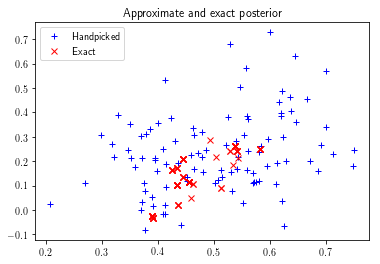

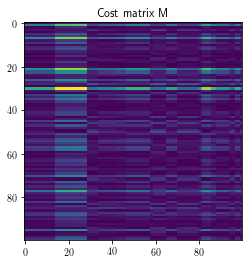

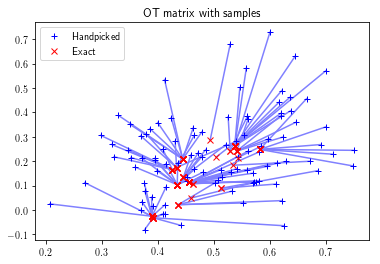

In [8]:
a, b = np.ones((n,)) / n, np.ones((n,)) / n  # uniform distribution on samples

# loss matrix
M = ot.dist(posttemp, posexacttemp)

pl.figure(1)
pl.plot(posttemp[:, 0], posttemp[:, 1], '+b', label='Handpicked')
pl.plot(posexacttemp[:, 0], posexacttemp[:, 1], 'xr', label='Exact')
pl.legend(loc=0)
pl.title('Approximate and exact posterior')


pl.figure(2)
pl.imshow(M, interpolation='nearest')
pl.title('Cost matrix M')

G0 = ot.emd(a, b, M)

pl.figure(4)
ot.plot.plot2D_samples_mat(posttemp, posexacttemp, G0, c=[.5, .5, 1])
pl.plot(posttemp[:, 0], posttemp[:, 1], '+b', label='Handpicked')
pl.plot(posexacttemp[:, 0], posexacttemp[:, 1], 'xr', label='Exact')
pl.legend(loc=0)
pl.title('OT matrix with samples')

G0 = ot.emd(a, b, M, log=True)
print('EMD cost (handpicked):', G0[1].get('cost'))

#### Compute EMD for MLP

Load data 

In [9]:
posttemp =  np.transpose(posterior_mlp[0:2,:])
print(posttemp[1:5,:])
print(posttemp.shape)

[[0.79995608 0.67896384]
 [0.76673955 0.50405079]
 [0.88400757 0.52339119]
 [0.82194912 0.83913189]]
(100, 2)


Compute EMD using POT

EMD cost (handpicked): 0.3988939489888994


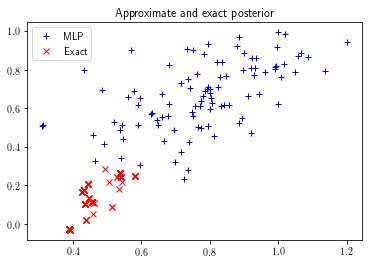

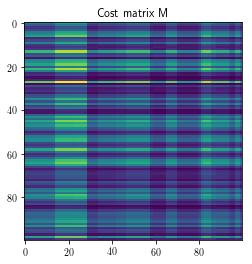

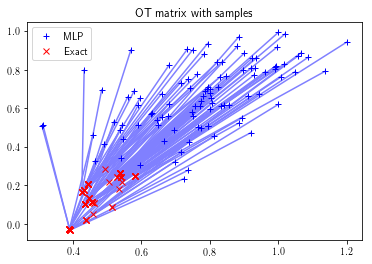

In [10]:
a, b = np.ones((n,)) / n, np.ones((n,)) / n  # uniform distribution on samples

# loss matrix
M = ot.dist(posttemp, posexacttemp)

pl.figure(1)
pl.plot(posttemp[:, 0], posttemp[:, 1], '+b', label='MLP')
pl.plot(posexacttemp[:, 0], posexacttemp[:, 1], 'xr', label='Exact')
pl.legend(loc=0)
pl.title('Approximate and exact posterior')


pl.figure(2)
pl.imshow(M, interpolation='nearest')
pl.title('Cost matrix M')

G0 = ot.emd(a, b, M)

pl.figure(4)
ot.plot.plot2D_samples_mat(posttemp, posexacttemp, G0, c=[.5, .5, 1])
pl.plot(posttemp[:, 0], posttemp[:, 1], '+b', label='MLP')
pl.plot(posexacttemp[:, 0], posexacttemp[:, 1], 'xr', label='Exact')
pl.legend(loc=0)
pl.title('OT matrix with samples')

G0 = ot.emd(a, b, M, log=True)
print('EMD cost (handpicked):', G0[1].get('cost'))

#### Compute EMD for PEN

Load data

In [11]:
posttemp =  np.transpose(posterior_pen[0:2,:])
print(posttemp[1:5,:])
print(posttemp.shape)

[[0.91198558 0.33286211]
 [0.6955902  0.18387103]
 [0.7165724  0.27675626]
 [0.83457136 0.362028  ]]
(100, 2)


Compute EMD using POT

EMD cost (handpicked): 0.10310578049844256


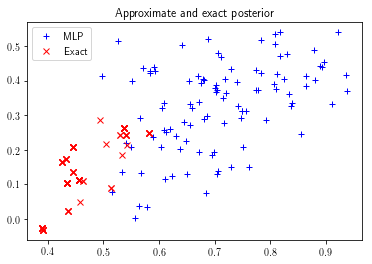

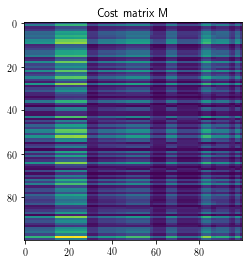

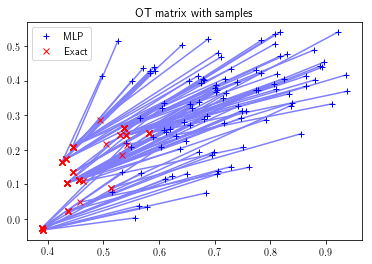

In [12]:
a, b = np.ones((n,)) / n, np.ones((n,)) / n  # uniform distribution on samples

# loss matrix
M = ot.dist(posttemp, posexacttemp)


pl.figure(1)
pl.plot(posttemp[:, 0], posttemp[:, 1], '+b', label='MLP')
pl.plot(posexacttemp[:, 0], posexacttemp[:, 1], 'xr', label='Exact')
pl.legend(loc=0)
pl.title('Approximate and exact posterior')


pl.figure(2)
pl.imshow(M, interpolation='nearest')
pl.title('Cost matrix M')

G0 = ot.emd(a, b, M)

pl.figure(4)
ot.plot.plot2D_samples_mat(posttemp, posexacttemp, G0, c=[.5, .5, 1])
pl.plot(posttemp[:, 0], posttemp[:, 1], '+b', label='MLP')
pl.plot(posexacttemp[:, 0], posexacttemp[:, 1], 'xr', label='Exact')
pl.legend(loc=0)
pl.title('OT matrix with samples')

G0 = ot.emd(a, b, M, log=True)
print('EMD cost (handpicked):', G0[1].get('cost'))

### Compute EMD for multiple posterior dist

In [13]:
nbr_posterior = 100 # this should be 100 later...

#### 10^6 traning data obs

Calc EMD 

In [14]:
# Handpicked
emd_handpicked = np.zeros((1, nbr_posterior))

idx = -1
for i in range(0, nbr_posterior*2, 2):
    idx = idx +1
    posttemp = np.transpose(posterior_handpicked[i:i+2,:])
    posexacttemp = np.transpose(exact_posterior[i:i+2,0:n])
    M = ot.dist(posttemp, posexacttemp)
    emd_handpicked[:,idx]  = ot.emd(a, b, M, log=True)[1].get('cost')

# MLP small
emd_mlp_small = np.zeros((1, nbr_posterior))

idx = -1
for i in range(0, nbr_posterior*2, 2):
    idx = idx +1
    posttemp = np.transpose(posterior_mlp_small[i:i+2,:])
    posexacttemp = np.transpose(exact_posterior[i:i+2,0:n])
    M = ot.dist(posttemp, posexacttemp)
    emd_mlp_small[:,idx]  = ot.emd(a, b, M, log=True)[1].get('cost')

# MLP large
emd_mlp_large = np.zeros((1, nbr_posterior))

idx = -1
for i in range(0, nbr_posterior*2, 2):
    idx = idx +1
    posttemp = np.transpose(posterior_mlp_large[i:i+2,:])
    posexacttemp = np.transpose(exact_posterior[i:i+2,0:n])
    M = ot.dist(posttemp, posexacttemp)
    emd_mlp_large[:,idx]  = ot.emd(a, b, M, log=True)[1].get('cost')

# PEN
emd_pen = np.zeros((1, nbr_posterior))

idx = -1
for i in range(0, nbr_posterior*2, 2):
    idx = idx +1
    posttemp = np.transpose(posterior_pen[i:i+2,:])
    posexacttemp = np.transpose(exact_posterior[i:i+2,0:n])
    M = ot.dist(posttemp, posexacttemp)
    emd_pen[:,idx]  = ot.emd(a, b, M, log=True)[1].get('cost')

# PEN-0
emd_pen0 = np.zeros((1, nbr_posterior))

idx = -1
for i in range(0, nbr_posterior*2, 2):
    idx = idx +1
    posttemp = np.transpose(posterior_pen0[i:i+2,:])
    posexacttemp = np.transpose(exact_posterior[i:i+2,0:n])
    M = ot.dist(posttemp, posexacttemp)
    emd_pen0[:,idx]  = ot.emd(a, b, M, log=True)[1].get('cost')


Plot box plot

Text(0,0.5,'Est. Wasserstein dist.')

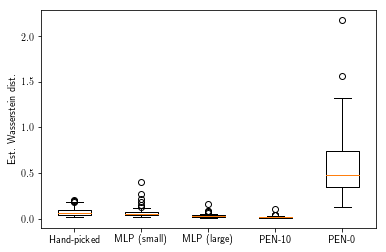

In [15]:
emd_matrix = np.zeros((nbr_posterior, 5))
emd_matrix[:,0] = emd_handpicked
emd_matrix[:,1] = emd_mlp_small
emd_matrix[:,2] = emd_mlp_large
emd_matrix[:,3] = emd_pen
emd_matrix[:,4] = emd_pen0

pl.figure(1)
pl.boxplot(emd_matrix)
pl.xticks([1, 2, 3, 4, 5], ["Hand-picked", "MLP (small)", "MLP (large)", "PEN-10", "PEN-0"])
pl.ylabel("Est. Wasserstein dist.")

#### Smaller training data 

Read data

In [16]:
posterior_mlp_2_small = np.loadtxt(open("data/MA2 noisy data/posteriors_multiple_data_sets_mlp_2_small.csv", "rb"), delimiter=",", skiprows=1)
posterior_mlp_3_small = np.loadtxt(open("data/MA2 noisy data/posteriors_multiple_data_sets_mlp_3_small.csv", "rb"), delimiter=",", skiprows=1)
posterior_mlp_4_small = np.loadtxt(open("data/MA2 noisy data/posteriors_multiple_data_sets_mlp_4_small.csv", "rb"), delimiter=",", skiprows=1)

posterior_mlp_2_large = np.loadtxt(open("data/MA2 noisy data/posteriors_multiple_data_sets_mlp_2_large.csv", "rb"), delimiter=",", skiprows=1)
posterior_mlp_3_large = np.loadtxt(open("data/MA2 noisy data/posteriors_multiple_data_sets_mlp_3_large.csv", "rb"), delimiter=",", skiprows=1)
posterior_mlp_4_large = np.loadtxt(open("data/MA2 noisy data/posteriors_multiple_data_sets_mlp_4_large.csv", "rb"), delimiter=",", skiprows=1)

posterior_pen_2 = np.loadtxt(open("data/MA2 noisy data/posteriors_multiple_data_sets_pen_2.csv", "rb"), delimiter=",", skiprows=1)
posterior_pen_3 = np.loadtxt(open("data/MA2 noisy data/posteriors_multiple_data_sets_pen_3.csv", "rb"), delimiter=",", skiprows=1)
posterior_pen_4 = np.loadtxt(open("data/MA2 noisy data/posteriors_multiple_data_sets_pen_4.csv", "rb"), delimiter=",", skiprows=1)

posterior_pen0_2 = np.loadtxt(open("data/MA2 noisy data/posteriors_multiple_data_sets_pen0_2.csv", "rb"), delimiter=",", skiprows=1)
posterior_pen0_3 = np.loadtxt(open("data/MA2 noisy data/posteriors_multiple_data_sets_pen0_3.csv", "rb"), delimiter=",", skiprows=1)
posterior_pen0_4 = np.loadtxt(open("data/MA2 noisy data/posteriors_multiple_data_sets_pen0_4.csv", "rb"), delimiter=",", skiprows=1)


calc EMD

In [17]:
emd_mlp_2_small = np.zeros((1, nbr_posterior))
emd_mlp_3_small = np.zeros((1, nbr_posterior))
emd_mlp_4_small = np.zeros((1, nbr_posterior))

emd_mlp_2_large = np.zeros((1, nbr_posterior))
emd_mlp_3_large = np.zeros((1, nbr_posterior))
emd_mlp_4_large = np.zeros((1, nbr_posterior))

emd_pen_2 = np.zeros((1, nbr_posterior))
emd_pen_3 = np.zeros((1, nbr_posterior))
emd_pen_4 = np.zeros((1, nbr_posterior))

emd_pen0_2 = np.zeros((1, nbr_posterior))
emd_pen0_3 = np.zeros((1, nbr_posterior))
emd_pen0_4 = np.zeros((1, nbr_posterior))


idx = -1
for i in range(0, nbr_posterior*2, 2):
    
    # values for iteration i 
    idx = idx +1
    posexacttemp = np.transpose(exact_posterior[i:i+2,0:n])

    # mlp    
    posttemp = np.transpose(posterior_mlp_2_small[i:i+2,:])
    M = ot.dist(posttemp, posexacttemp)
    emd_mlp_2_small[:,idx]  = ot.emd(a, b, M, log=True)[1].get('cost')

    posttemp = np.transpose(posterior_mlp_3_small[i:i+2,:])
    M = ot.dist(posttemp, posexacttemp)
    emd_mlp_3_small[:,idx]  = ot.emd(a, b, M, log=True)[1].get('cost')

    posttemp = np.transpose(posterior_mlp_4_small[i:i+2,:])
    M = ot.dist(posttemp, posexacttemp)
    emd_mlp_4_small[:,idx]  = ot.emd(a, b, M, log=True)[1].get('cost')

    posttemp = np.transpose(posterior_mlp_2_large[i:i+2,:])
    M = ot.dist(posttemp, posexacttemp)
    emd_mlp_2_large[:,idx]  = ot.emd(a, b, M, log=True)[1].get('cost')

    posttemp = np.transpose(posterior_mlp_3_large[i:i+2,:])
    M = ot.dist(posttemp, posexacttemp)
    emd_mlp_3_large[:,idx]  = ot.emd(a, b, M, log=True)[1].get('cost')

    posttemp = np.transpose(posterior_mlp_4_large[i:i+2,:])
    M = ot.dist(posttemp, posexacttemp)
    emd_mlp_4_large[:,idx]  = ot.emd(a, b, M, log=True)[1].get('cost')

    # pen
    posttemp = np.transpose(posterior_pen_2[i:i+2,:])
    M = ot.dist(posttemp, posexacttemp)
    emd_pen_2[:,idx]  = ot.emd(a, b, M, log=True)[1].get('cost')

    posttemp = np.transpose(posterior_pen_3[i:i+2,:])
    M = ot.dist(posttemp, posexacttemp)
    emd_pen_3[:,idx]  = ot.emd(a, b, M, log=True)[1].get('cost')

    posttemp = np.transpose(posterior_pen_4[i:i+2,:])
    M = ot.dist(posttemp, posexacttemp)
    emd_pen_4[:,idx]  = ot.emd(a, b, M, log=True)[1].get('cost')

    # pen-0
    posttemp = np.transpose(posterior_pen0_2[i:i+2,:])
    M = ot.dist(posttemp, posexacttemp)
    emd_pen0_2[:,idx]  = ot.emd(a, b, M, log=True)[1].get('cost')

    posttemp = np.transpose(posterior_pen0_3[i:i+2,:])
    M = ot.dist(posttemp, posexacttemp)
    emd_pen0_3[:,idx]  = ot.emd(a, b, M, log=True)[1].get('cost')

    posttemp = np.transpose(posterior_pen0_4[i:i+2,:])
    M = ot.dist(posttemp, posexacttemp)
    emd_pen0_4[:,idx]  = ot.emd(a, b, M, log=True)[1].get('cost')


Set up matrices for plotting

In [18]:
data2 = np.zeros((nbr_posterior, 4))

data2[:,0] = emd_mlp_2_small
data2[:,1] = emd_mlp_2_large
data2[:,2] = emd_pen_2
data2[:,3] = emd_pen0_2

data3 = np.zeros((nbr_posterior, 4))

data3[:,0] = emd_mlp_3_small
data3[:,1] = emd_mlp_3_large
data3[:,2] = emd_pen_3
data3[:,3] = emd_pen0_3

data4 = np.zeros((nbr_posterior, 4))

data4[:,0] = emd_mlp_4_small
data4[:,1] = emd_mlp_4_large
data4[:,2] = emd_pen_4
data4[:,3] = emd_pen0_4

Plot box plots

Text(0,0.5,'Wasserstein dist.')

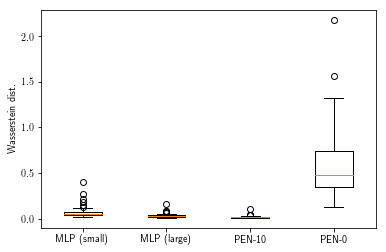

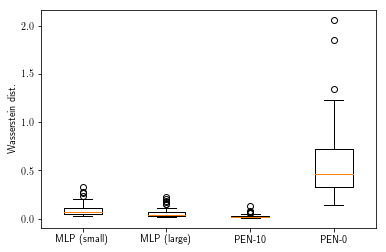

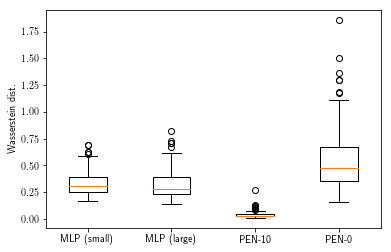

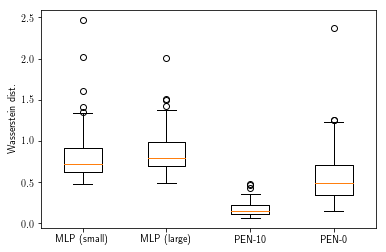

In [19]:
pl.figure(0)
pl.boxplot(emd_matrix[:,1:5])
pl.xticks([1, 2, 3, 4], ["MLP (small)", "MLP (large)", "PEN-10","PEN-0"]);
pl.ylabel("Wasserstein dist.")

pl.figure(1)
pl.boxplot(data2)
pl.xticks([1, 2, 3, 4], ["MLP (small)", "MLP (large)", "PEN-10","PEN-0"]);
pl.ylabel("Wasserstein dist.")

pl.figure(2)
pl.boxplot(data3)
pl.xticks([1, 2, 3, 4], ["MLP (small)", "MLP (large)", "PEN-10","PEN-0"]);
pl.ylabel("Wasserstein dist.")

pl.figure(3)
pl.boxplot(data4)
pl.xticks([1, 2, 3, 4], ["MLP (small)", "MLP (large)", "PEN-10","PEN-0"]);
pl.ylabel("Wasserstein dist.")

Calc mean EMD

In [20]:
mean_emd_matrix = np.zeros((4, 4))
mean_emd_vec = np.mean(emd_handpicked)*np.ones((4, 1))

mean_emd_matrix[0,:] = np.mean(emd_matrix[:,1:5],0)
mean_emd_matrix[1,:] = np.mean(data2,0)
mean_emd_matrix[2,:] = np.mean(data3,0)
mean_emd_matrix[3,:] = np.mean(data4,0)

np.mean(emd_handpicked)

0.07495881147100096

Plot mean EMD

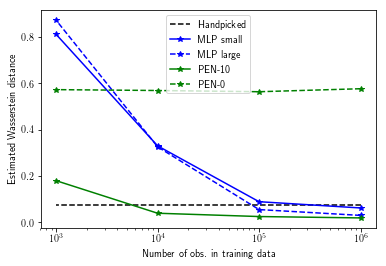

In [21]:
x_scale = [10**6, 10**5, 10**4, 10**3]

pl.figure(0)
pl.semilogx(x_scale,mean_emd_vec, "--k")
pl.semilogx(x_scale, mean_emd_matrix[:,0], "*-b")
pl.semilogx(x_scale, mean_emd_matrix[:,1], "*-b", linestyle = "--")
pl.semilogx(x_scale, mean_emd_matrix[:,2], "*-g")
pl.semilogx(x_scale, mean_emd_matrix[:,3], "*-g", linestyle = "--")
pl.xlabel("Number of obs. in training data")
pl.ylabel("Estimated Wasserstein distance")
pl.legend(("Handpicked","MLP small","MLP large","PEN-10", "PEN-0"))
pl.savefig("figures/res_ma2_wasserstein.eps", format="eps", dpi=1000)